## Presentation

Hello guys, my name is Diogo and this is my first submission in Kaggle, so all feedback is welcome and I'd love if you encouraged me to keep up on practicing :) 

### Introduction to the Challenge

The intention of this challenge is to predict the sales price for each house. The evaluation will be done by assessing the RMSE. 

I'd like to acknowledge @bsivavenu which has inspired much of the work presented in the notebook.

### Importing all the necessary Libraries

In [1]:
import numpy as np #Numpy is meant for mathematical operations
import pandas as pd #Pandas allows Data Manipulation and analysis 
import matplotlib.pyplot as plt #Visual representations
import seaborn as sns #Another visualization library that is more complex
from sklearn import ensemble, tree, linear_model #Importing algorithms like Ensemble, Trees and Linear Regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold #Importing techniques that allow to split the dataset into train and test
from sklearn.metrics import r2_score, mean_squared_error, make_scorer #Importing metrics that will allow to understand how good is our model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.utils import shuffle 

### Importing Dataset

In [2]:
path_train = r"C:\Users\Diogo\Documents\Data Science Portfolio\Desafio 1 Machine Learning\house-prices-advanced-regression-techniques\train.csv"
path_test = r"C:\Users\Diogo\Documents\Data Science Portfolio\Desafio 1 Machine Learning\house-prices-advanced-regression-techniques\test.csv"
House_Data_train = pd.read_csv(path_train)
House_Data_test = pd.read_csv(path_test)

As we can see, there are 2 datasets that are made available, one that is called 'train' and another one that is called 'test'.
There is a specific purpose of having two separate datasets:
- With train we will be building the algorithm;
- With the test dataset we will be able to evaluate the generalization capability of the algorithm that we have developed

It's also important to bear in mind that sometimes when we inject too much data for the algorithm to learn, it will overfit which will lead to a decrease of the errors made in the training dataset, but will increase the errors in the test dataset.

Getting a first look into the Data:

In [3]:
House_Data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
House_Data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


There are quite a few things that we can observe just by observing these lines of the datasets:
- The column 'Id' is an unique identifier of each observation, which we can use as an index;
- There are a lot of 'NaN' values in the datasets, like in 'Alley' and 'Fence' which stands for 'Not a Number'

Making the 'Id' variable the index:

In [5]:
House_Data_train.set_index('Id', inplace = True)
House_Data_test.set_index('Id', inplace = True)

### Variable Description

- SalePrice - the property's sale price in dollars - target variable <br>
- MSSubClass: The building class <br>
- MSZoning: The general zoning classification <br>
- LotFrontage: Linear feet of street connected to property <br>
- LotArea: Lot size in square feet <br>
- Street: Type of road access <br>
- Alley: Type of alley access <br>
- LotShape: General shape of property <br>
- LandContour: Flatness of the property<br>
- Utilities: Type of utilities available<br>
- LotConfig: Lot configuration<br>
- LandSlope: Slope of property<br>
- Neighborhood: Physical locations within Ames city limits<br>
- Condition1: Proximity to main road or railroad<br>
- Condition2: Proximity to main road or railroad (if a second is present)<br>
- BldgType: Type of dwelling<br>
- HouseStyle: Style of dwelling<br>
- OverallQual: Overall material and finish quality<br>
- OverallCond: Overall condition rating<br>
- YearBuilt: Original construction date<br>
- YearRemodAdd: Remodel date<br>
- RoofStyle: Type of roof<br>
- RoofMatl: Roof material<br>
- Exterior1st: Exterior covering on house<br>
- Exterior2nd: Exterior covering on house (if more than one material)<br>
- MasVnrType: Masonry veneer type<br>
- MasVnrArea: Masonry veneer area in square feet<br>
- ExterQual: Exterior material quality<br>
- ExterCond: Present condition of the material on the exterior<br>
- Foundation: Type of foundation<br>
- BsmtQual: Height of the basement<br>
- BsmtCond: General condition of the basement<br>
- BsmtExposure: Walkout or garden level basement walls<br>
- BsmtFinType1: Quality of basement finished area<br>
- BsmtFinSF1: Type 1 finished square feet<br>
- BsmtFinType2: Quality of second finished area (if present)<br>
- BsmtFinSF2: Type 2 finished square feet<br>
- BsmtUnfSF: Unfinished square feet of basement area<br>
- TotalBsmtSF: Total square feet of basement area<br>
- Heating: Type of heating<br>
- HeatingQC: Heating quality and condition<br>
- CentralAir: Central air conditioning<br>
- Electrical: Electrical system<br>
- 1stFlrSF: First Floor square feet<br>
- 2ndFlrSF: Second floor square feet<br>
- LowQualFinSF: Low quality finished square feet (all floors)<br>
- GrLivArea: Above grade (ground) living area square feet<br>
- BsmtFullBath: Basement full bathrooms<br>
- BsmtHalfBath: Basement half bathrooms<br>
- FullBath: Full bathrooms above grade<br>
- HalfBath: Half baths above grade<br>
- Bedroom: Number of bedrooms above basement level<br>
- Kitchen: Number of kitchens<br>
- KitchenQual: Kitchen quality<br>
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
- Functional: Home functionality rating<br>
- Fireplaces: Number of fireplaces<br>
- FireplaceQu: Fireplace quality<br>
- GarageType: Garage location<br>
- GarageYrBlt: Year garage was built<br>
- GarageFinish: Interior finish of the garage<br>
- GarageCars: Size of garage in car capacity<br>
- GarageArea: Size of garage in square feet<br>
- GarageQual: Garage quality<br>
- GarageCond: Garage condition<br>
- PavedDrive: Paved driveway<br>
- WoodDeckSF: Wood deck area in square feet<br>
- OpenPorchSF: Open porch area in square feet<br>
- EnclosedPorch: Enclosed porch area in square feet<br>
- 3SsnPorch: Three season porch area in square feet<br>
- ScreenPorch: Screen porch area in square feet<br>
- PoolArea: Pool area in square feet<br>
- PoolQC: Pool quality<br>
- Fence: Fence quality<br>
- MiscFeature: Miscellaneous feature not covered in other categories<br>
- MiscVal: $Value of miscellaneous feature<br>
- MoSold: Month Sold<br>
- YrSold: Year Sold<br>
- SaleType: Type of sale<br>
- SaleCondition: Condition of sale

# EDA

### Understanding the amount of columns and observations in the datasets

In [6]:
House_Data_train.shape,House_Data_test.shape

((1460, 80), (1459, 79))

As it's possible to observe, there are 1460 observations in the train dataset and 1459 observations in the test dataset and 80 columns (variables) in the train and 79 in test. The difference in the columns is because the test dataset will not have the dependent variable (SalePrice)

### Observing the Data Types of the variables

In [7]:
House_Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

As we can see, there's 3 float variables, 34 integers and 43 objects

### Understanding Missing Values

In [8]:
percent_missing = House_Data_train.isna().sum() * 100 / House_Data_train.shape[0]
missing_value_House_Data_train = pd.DataFrame({'Percent Missing': percent_missing})

missing_value_House_Data_train.sort_values('Percent Missing', inplace=True, ascending = False)

missing_value_House_Data_train.head(10)

,Percent Missing
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


There are a lot of missing values in these variables, but we will be dealing with this in a future step.

### Dispersion statistics

In [9]:
House_Data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


With this it's possible to understand already some facts:
- YearBuilt explains that the oldest house was built in 1872 and earliest in 2010;
- The lowest SalePrice was 34.900€ while the most expensive was 755.000€
- The house that was sold the earliest was in 2006 and the most recent was in 2010;

In [10]:
House_Data_train.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


From this analysis it's also possible to know the following:
- The most common type of Sale what of the type Warranty Deed - Conventional;
- Most of the Sales were Sales that operated under the Normal Condition;

### SalesPrice Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\Diogo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


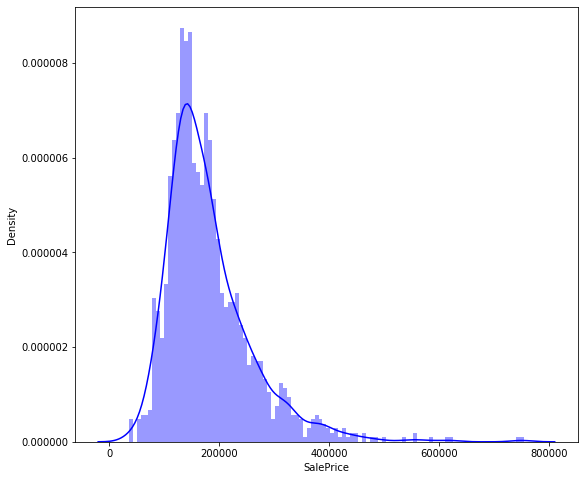

In [11]:
print(House_Data_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(House_Data_train['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

From this plot we can understand that although the mean (180.921) is very near the median value (163.000) [exhibiting right skewness], there are some clear outliers as we can see that the max value that the distribution assumes can go as far as 755.000€.

### Creating the Target Variable before any data pre-processing

In [12]:
House_Data_train.SalePrice = np.log1p(House_Data_train.SalePrice)
y = House_Data_train.SalePrice

### Observing the relationship between the Most Correlated Features with the Dependent Variable

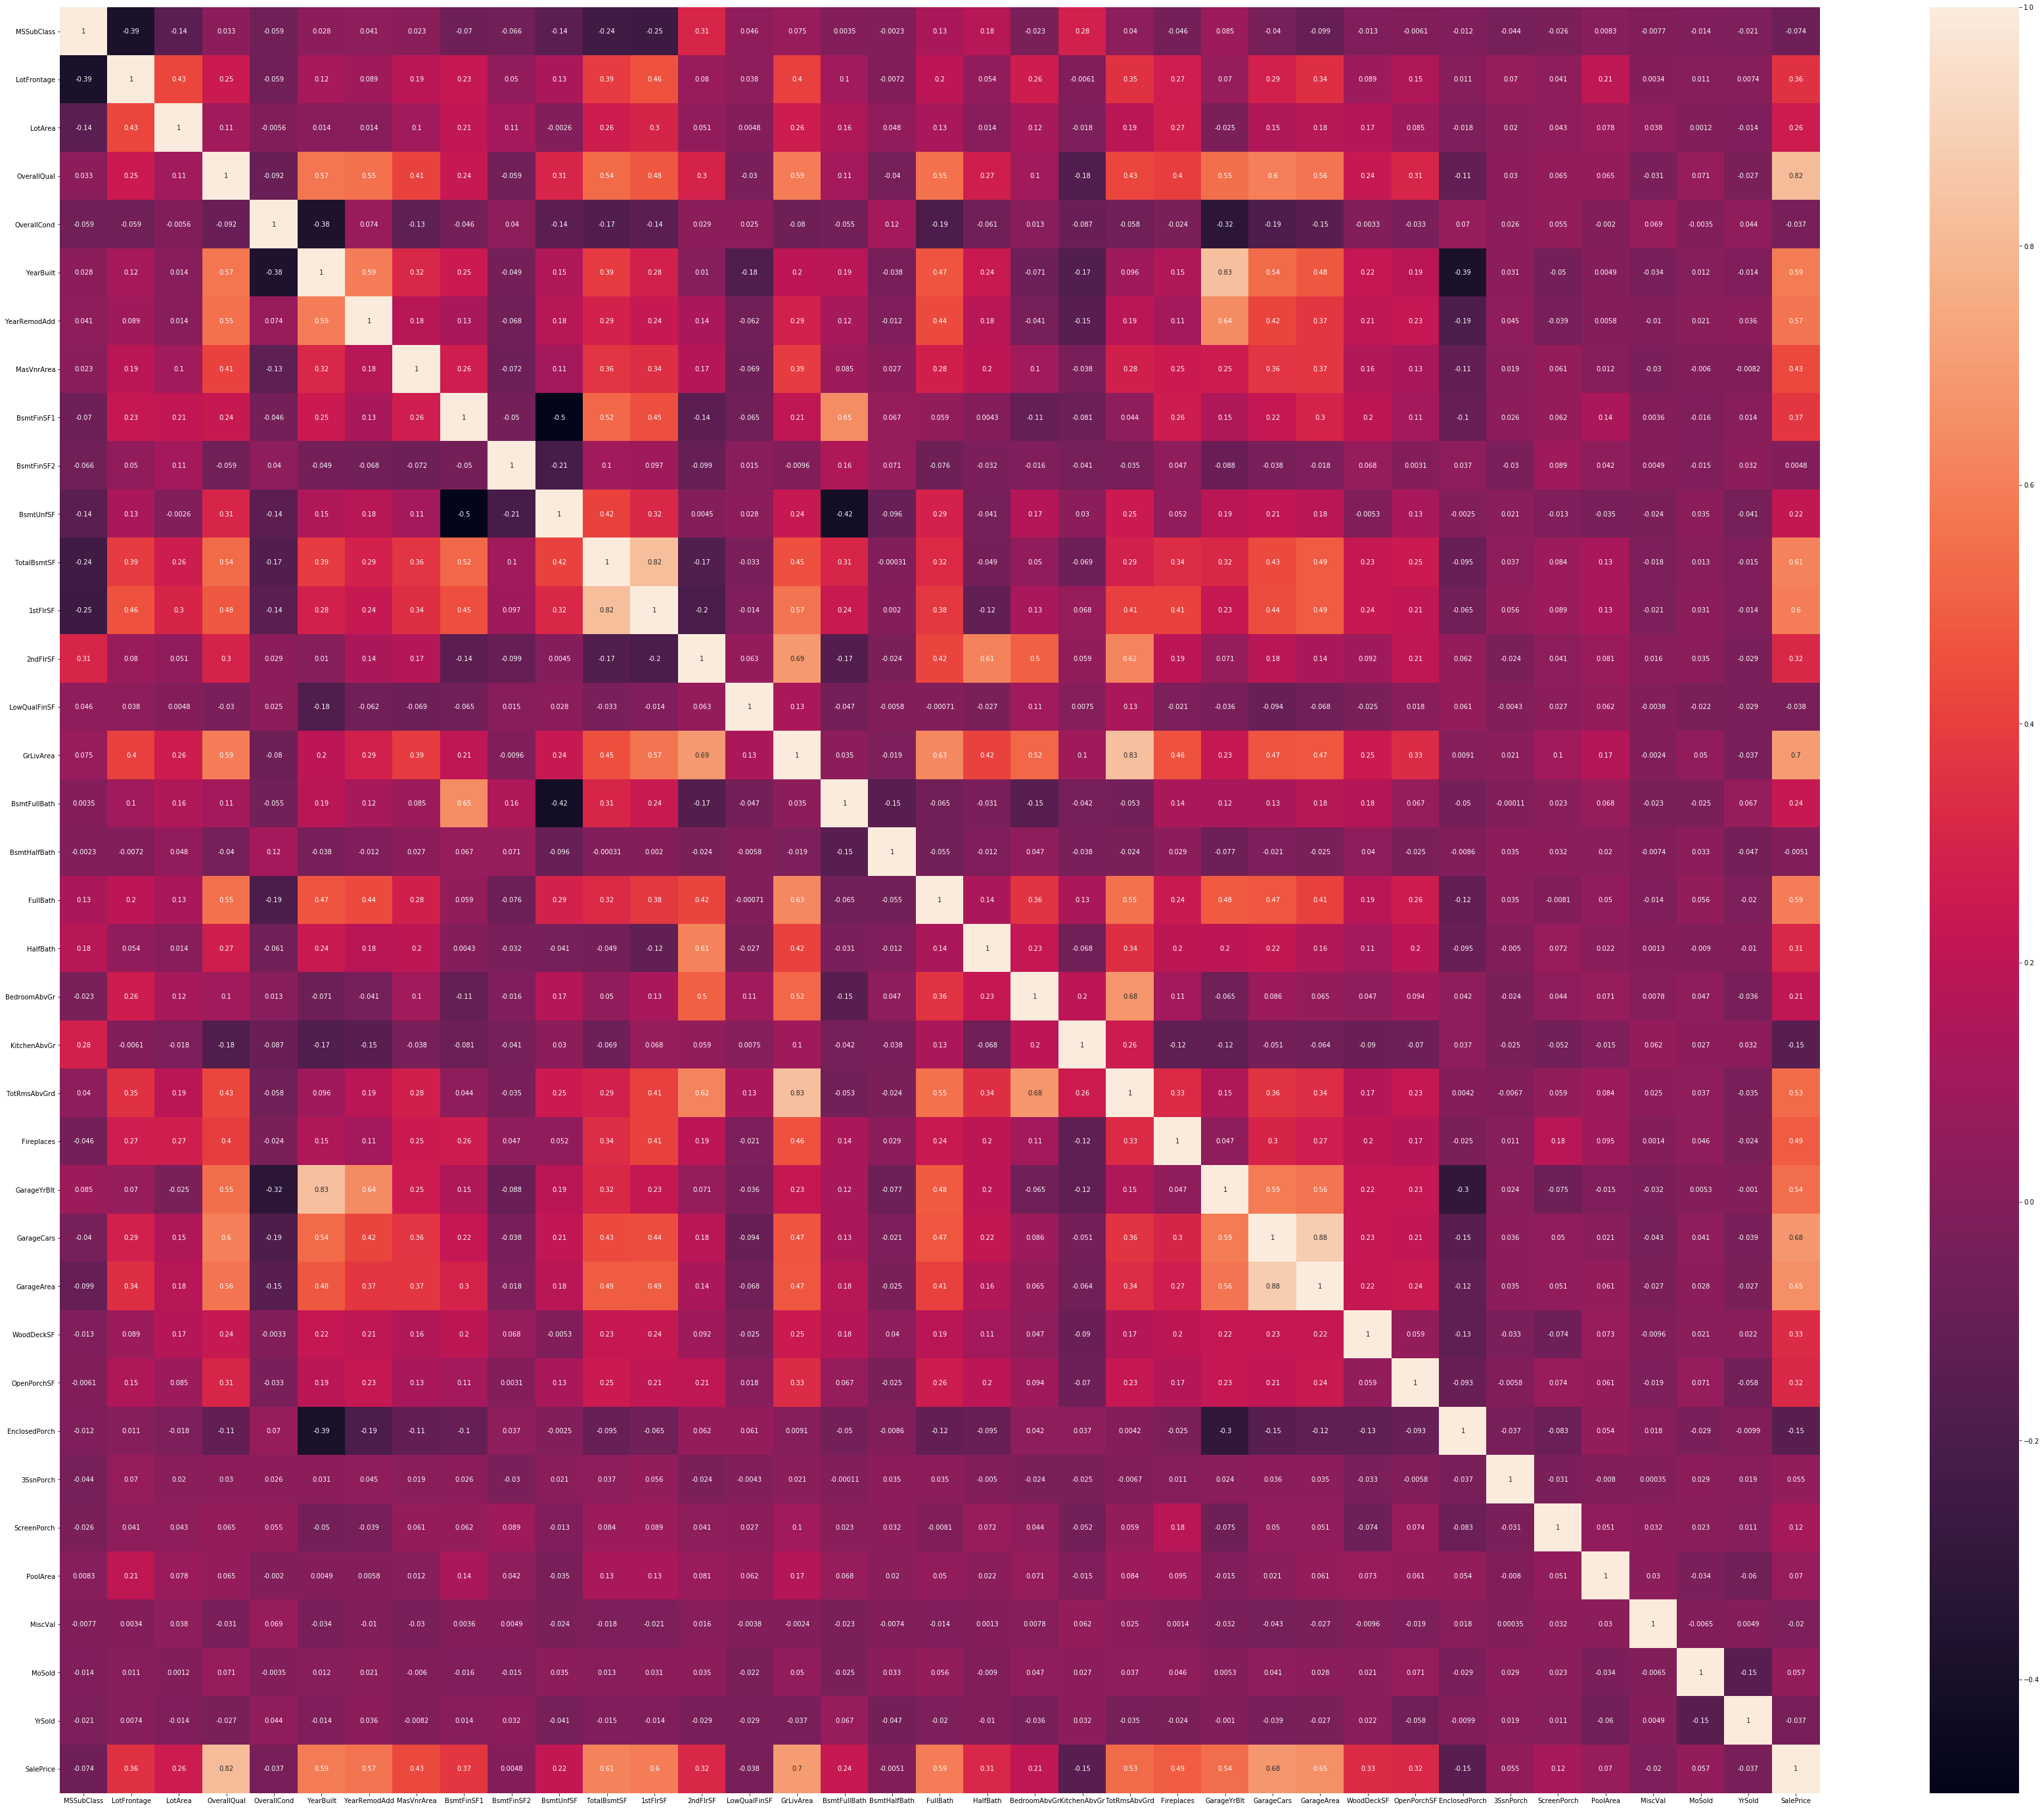

In [13]:
plt.figure(figsize = (60,50))
sns.heatmap(House_Data_train.corr(), annot=True)
plt.show()

Since this is barely understandable, we will plot only the variables that have high correlations with the dependent variable:

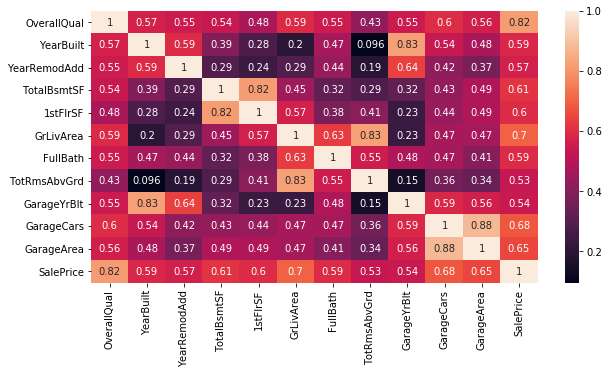

In [14]:
Correlation_Matrix = House_Data_train.corr()
Most_Correlated_Features = Correlation_Matrix.index[abs(Correlation_Matrix["SalePrice"])>0.5]
plt.figure(figsize=(10,5))
g = sns.heatmap(House_Data_train[Most_Correlated_Features].corr(),annot=True)

From this we can understand that, 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea' are all variables with a high correlation with the SalePrice, meaning that they are the most important features relatively to the target.

In a similar fashion, variables 'TotalBsmtSF' and '1stFlrSF', 'GrLivArea' and 'TotRmsAbvGrd', 'GarageCars' and 'GarageArea' are highly correlated between themselves so we won't be analyzing the ones that have the least correlation with the dependent variable ('TotRmsAbvGrd', 'GarageArea')

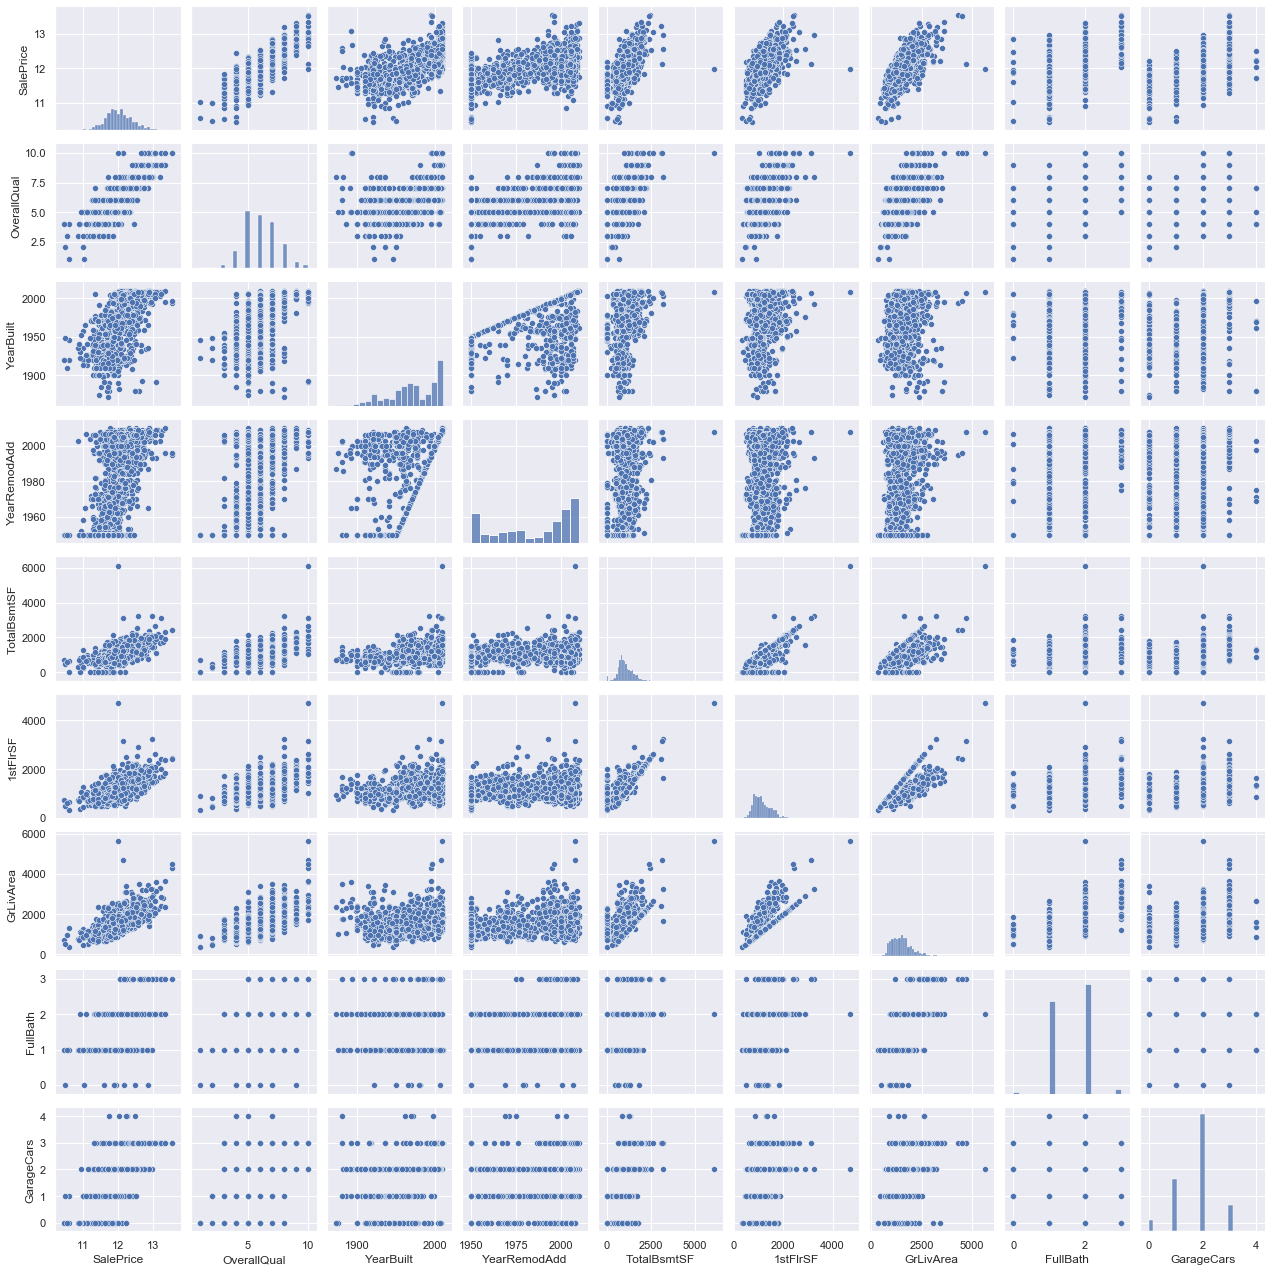

In [15]:
sns.set()
Correlated_Columns = ['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars']
sns.pairplot(House_Data_train[Correlated_Columns], height = 2)
plt.show();

Here we can see that the houses with higher OverallQual tend to have higher sale prices, just like houses with 2 or 3 FullBaths also tend to be more expensive, for example.

### Grouping Numerical and Categorical Features

In [16]:
categorical_features = House_Data_train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
numerical_features = House_Data_train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [18]:
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 36
Categorical features : 43


In [19]:
House_Data_train_Num = House_Data_train[numerical_features]
House_Data_train_Cat = House_Data_train[categorical_features]

### Dealing with Missing Values

Missing values exist when there's data that isn't available to be analysed, because, for example a value might have not been captured or because a field might not apply to be answered by a specific customer.

There are many ways to deal with missing values like using models to understand which value should be inserted, imputing values using the average or mode, but in this case we will be using the median.

In [20]:
House_Data_train_Num = House_Data_train_Num.fillna(House_Data_train_Num.median())

### Understanding the Skewness

In [21]:
from scipy.stats import skew 
skewness = House_Data_train_Num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.677636
dtype: float64

All variables that observe a Skewness above 1 witness High Positive Skewness, meaning that their means are significantly higher than their median.

In [22]:
skewness = skewness[abs(skewness)>1]
skewness.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In this case we can see that we have plenty of variables that observe that phenomena.

This can be dealt with through the usage of square roots or log(x). The first will do it in a softer way while the latter will have a stronger effect.

In this case, I've decided to go with a log(x) approach.

In [23]:
skew_features = House_Data_train[skewness.index]

In [24]:
skew_features = np.log1p(skew_features)

### Creating Dummy Variables

In [25]:
House_Data_train_Cat = pd.get_dummies(House_Data_train_Cat)
House_Data_train_Cat.shape

(1460, 252)

In [26]:
House_Data_train_Cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


## Modeling

Merging the Categorical and Numerical variables

In [27]:
House_Data_train = pd.concat([House_Data_train_Cat,House_Data_train_Num],axis=1)
House_Data_train.shape

(1460, 288)

 Now we have 288 columns which are the combination of the 252 categorical columns and 36 numerical ones

### Spliting the Dataset

In [28]:
X_train,X_test,y_train,y_test = train_test_split(House_Data_train,y,test_size = 0.3,random_state= 0)

As explained previously, the train dataset will be used for building the model while the test will be used to evaluate the algorithm.
The X represents all the variables that are used to explain the behavior that is happening in the dependent variable (sale price - Y)

Additionally, we are using 70% of the dataset for training and 30% for test which is a best practice when we have datasets with low amounts of observations which is the case.

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 288), (438, 288), (1022,), (438,))

Here we can see that both X and Y have the same amount of columns and that train and test have the same amount of observations.

In [30]:
n_folds = 5
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(House_Data_train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(House_Data_train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

Here the same function is defined for the train and test datasets  where through the usage of a K=5 Fold validation where the datasets are partitioned into 5 equal sized subsamples

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on test',rmse_CV_test(lr).mean())

rmse on train 725.2924075860863
rmse on test 0.25211328820936313


With this, we have developed a Linear Regression in which the metric 'Root Mean Squared Error' is for the train dataset of 725 and for test of 0.22.

Root Mean Squared Error represents the sample standard deviation of differences between predicted values and the observed values, which is used to assess the predictor's performance.

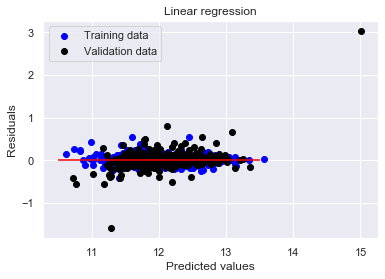

In [32]:
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

Through plotting the residuals, or in a simpler language, the difference between the predicted value and the actual values, we can see that although there is a convergence of values with approximately 0 residuals (accurately predicted), there's also some  predictions that resulted in different values from the real ones.